In [1]:
from eicvibe.machine_portal.lattice import Lattice
from eicvibe.machine_portal.bend import Bend
from eicvibe.machine_portal.drift import Drift
from eicvibe.machine_portal.quadrupole import Quadrupole
import numpy as np

In [2]:
d1= Drift(name="Drift1", length=1.0)
b1= Bend(name="Bend1", length=2.0)
b2= Bend(name="Bend2", length=2.0)
qf= Quadrupole(name="Quad1", length=0.6)
qd= Quadrupole(name="Quad2", length=0.6)


b1.add_parameter("BendP", "ANGLE", np.pi/20)
b2.add_parameter("BendP", "ANGLE", np.pi/20)


qf.add_parameter("MagneticMultipoleP", "K1", 1.2)
qd.add_parameter("MagneticMultipoleP", "K1", -1.2)


qf.add_parameter("ApertureP", "X", [-0.05,0.05])

In [3]:
cell = [b1, d1, qf, d1, b2, d1, qd, d1]
fodo = Lattice(name="FODO")
for elem in cell:
    if elem.name not in fodo.elements:
        fodo.add_element(elem)

In [4]:
fodo = Lattice(name="FODO")
fodo.add_branch("FODO", cell)

In [5]:
fodo.get_element("Quad1_1")

Quadrupole(name='Quad1_1', type='Quadrupole', length=0.6, inherit='Quad1', parameters=[ParameterGroup(name=MagneticMultipoleP, type=MagneticMultipoleP, parameters={'K1': 1.2}, subgroups=[]), ParameterGroup(name=ApertureP, type=ApertureP, parameters={'X': [-0.05, 0.05]}, subgroups=[])], plot_color='C1', plot_height=0.9, plot_cross_section=0.8)

In [6]:
fodo_yaml_dict = fodo.to_yaml_dict()
import yaml
print(yaml.safe_dump(fodo_yaml_dict, default_flow_style=False, sort_keys=False))
fodo_from_yaml = Lattice.from_yaml_dict(fodo_yaml_dict)


name: FODO
root_branch: FODO
elements:
- Bend:
    name: Bend1
    length: 2.0
    BendP:
      ANGLE: 0.15707963267948966
- Drift:
    name: Drift1
    length: 1.0
- Quadrupole:
    name: Quad1
    length: 0.6
    MagneticMultipoleP:
      K1: 1.2
    ApertureP:
      X:
      - -0.05
      - 0.05
- Bend:
    name: Bend2
    length: 2.0
    BendP:
      ANGLE: 0.15707963267948966
- Quadrupole:
    name: Quad2
    length: 0.6
    MagneticMultipoleP:
      K1: -1.2
FODO:
- Bend:
    name: Bend1_1
    length: 2.0
    inherit: Bend1
    BendP:
      ANGLE: 0.15707963267948966
- Drift:
    name: Drift1_1
    length: 1.0
    inherit: Drift1
- Quadrupole:
    name: Quad1_1
    length: 0.6
    inherit: Quad1
    MagneticMultipoleP:
      K1: 1.2
    ApertureP:
      X:
      - -0.05
      - 0.05
- Drift:
    name: Drift1_2
    length: 1.0
    inherit: Drift1
- Bend:
    name: Bend2_1
    length: 2.0
    inherit: Bend2
    BendP:
      ANGLE: 0.15707963267948966
- Drift:
    name: Drift1_3
   

9.2

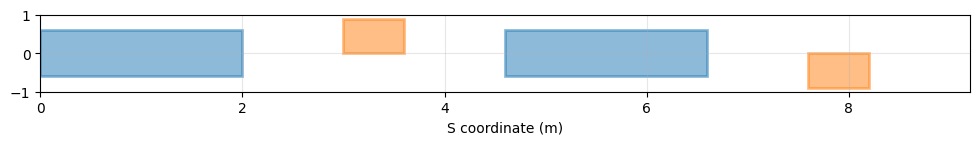

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 1))
fodo.plot_branch_beamline("FODO", ax=ax, s_start=0.0, normalized_strength=None)

((np.float64(8.975263200248625), np.float64(1.8333415835805789)),
 (np.float64(0.9510565162951536), np.float64(0.30901699437494745)))

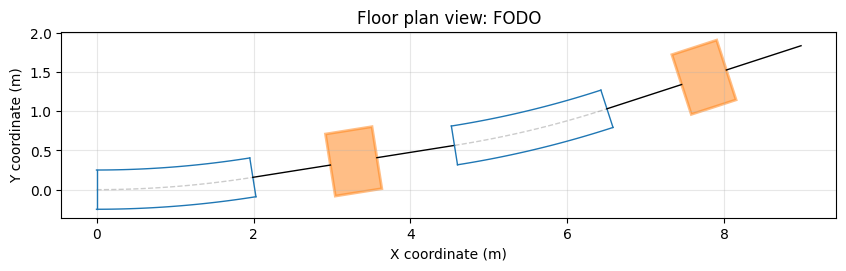

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
fodo.plot_branch_floorplan("FODO", ax=ax, )